## Sistema de Recomendação de Músicas

Este sistema de recomendações tem o intuito de fornecer uma recomendação de música ao usuário.

## Importando bibliotecas 

In [108]:
import pandas as pd
import numpy as np

## Obtendo dados
#### Adicionando nomes nas colunas em ambos o datasets e obtendo-os através do Pandas.

In [109]:
column_names_plays = ['user-mboxsha1', 'musicbrainz-artist-id', 'artist-name', 'plays']
data = pd.read_csv('usersha1-artmbid-artname-plays.tsv', sep='\t', names=column_names_plays)
data_plays = data.loc[0:1753500] #Diminui a base de dados pois meu computador não teve memória suficiente para rodar.

In [110]:
data_plays.head()

,user-mboxsha1,musicbrainz-artist-id,artist-name,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [111]:
column_names_profile = ['user-mboxsha1', 'gender', 'age', 'country', 'signup']
data_profile = pd.read_csv('usersha1-profile.tsv', sep='\t', names=column_names_profile)

In [112]:
data_profile.head()

,user-mboxsha1,gender,age,country,signup
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007"
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007"
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006"
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008"
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006"


## Juntar bases
#### Juntando as bases de dados para melhor manipulação.

In [113]:
data_all = pd.merge(data_plays,data_profile,on='user-mboxsha1')

In [114]:
data_all.head()

,user-mboxsha1,musicbrainz-artist-id,artist-name,plays,gender,age,country,signup
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137,f,22.0,Germany,"Feb 1, 2007"
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099,f,22.0,Germany,"Feb 1, 2007"
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897,f,22.0,Germany,"Feb 1, 2007"
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717,f,22.0,Germany,"Feb 1, 2007"
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706,f,22.0,Germany,"Feb 1, 2007"


## Visualização das importações
#### Importando bibliotecas para visualização dos dados em formatos gráficos.

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('white')
sns.set(style="ticks", color_codes=True)
%matplotlib inline

#### Verificando os artistas em média mais escutados.

In [116]:
data_all.groupby('artist-name')['plays'].mean().sort_values(ascending=False).head()

artist-name
big lonz          22202.0
the pillbugs      21691.0
tay zonday        12126.5
karolina           9801.0
nagaoka seikou     8939.0
Name: plays, dtype: float64

#### Verificando os artistas de fato mais escutados.

In [117]:
data_all.groupby('artist-name')['plays'].sum().sort_values(ascending=False).head()

artist-name
the beatles    3083096
radiohead      2724944
coldplay       1587725
pink floyd     1535860
muse           1474849
Name: plays, dtype: int64

#### Fazendo um somatório de todos os plays efetuados em cada artista e transformando em DataFrame.

In [118]:
df_total_plays = pd.DataFrame(data_all.groupby('artist-name')['plays'].sum().sort_values(ascending=False))
df_total_plays.head()


,plays
artist-name,
the beatles,3083096
radiohead,2724944
coldplay,1587725
pink floyd,1535860
muse,1474849


#### Fazendo a média das idades que escutam cada artista e transformando em DataFrame

In [119]:
df_mean_age = pd.DataFrame(data_all.groupby('artist-name')['age'].mean().sort_values(ascending=False))
df_mean_age.head()

,age
artist-name,
agoraphobic nosebleed + converge,666.0
nasmak,109.0
umwelt,109.0
indian,109.0
s. pompougnac,109.0


#### Pegando a média de plays efetuados por idade e comparanto com a quantidade total de plays.

In [120]:
df_mean_plays['mean_plays'] = pd.DataFrame(data_all.groupby('age')['plays'].mean().sort_values(ascending=True))
df_mean_plays.head()

,plays,mean_plays
age,,
2.0,49,183.868318
14.0,55,161.963703
15.0,228,180.639151
16.0,241,184.384740
17.0,797,214.671603


#### Alguns Histogramas
#### Analisando a média de plays por idades.

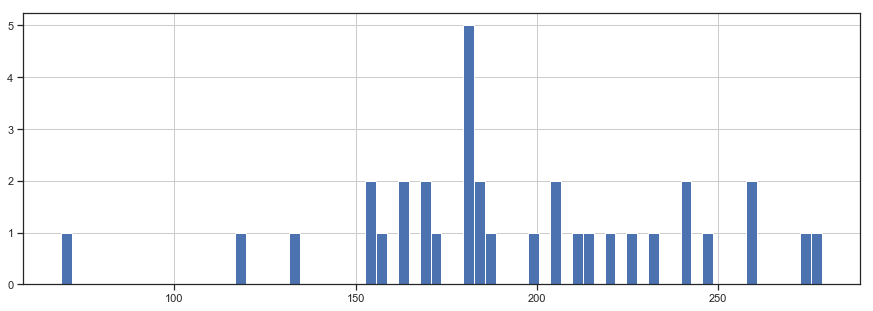

In [121]:
plt.figure(figsize=(15,5))
df_mean_plays['mean_plays'].hist(bins=70)

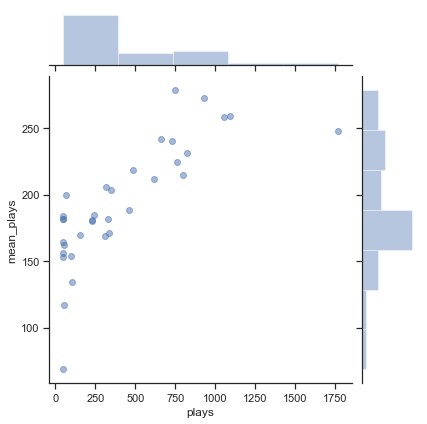

In [122]:
sns.jointplot(x='plays',y='mean_plays',data=df_mean_plays,alpha=0.5)

## Criação de matriz de todos os artistas tendo a idade como referência e  a quantidade de plays por cada idade.

In [123]:
musicmat = data_all.pivot_table(index='age',columns='artist-name',values='plays')
musicmat.head()

artist-name,cours de la somme,!!!,!5:b>@ 3070,!action pact!,!d!,!deladap,!distain,!hero,!t.o.o.h.!,#####,...,Ｒａｐｈａｅｌ,Ｓ,Ｓｃｈｗａｒｚ Ｓｔｅｉｎ,Ｖｅｒｓａｉｌｌｅｓ,ＹＵＩ,ａｔｔｉｃ,ｂｏｏｇｉｅｍａｎ,ｃｈａｒｉｏｔｓ,ｔhe gazette,ﾖﾐﾉｭﾃﾋ(akina nakamori)
age,,,,,,,,,,,,,,,,,,,,,
-1337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Comparando similaridade entre os dois artistas mais escutados.

In [124]:
the_beatles = musicmat['the beatles']
radiohead = musicmat['radiohead']

In [125]:
similar_to_beatles = musicmat.corrwith(the_beatles)
similar_to_radiohead = musicmat.corrwith(radiohead)

#### Correlação de outros artistas com o Beatles

In [126]:
corr_beatles = pd.DataFrame(similar_to_beatles, columns=['Correlation'])
corr_beatles.dropna(inplace=True)
corr_beatles.head()

,Correlation
artist-name,
!!!,0.321869
!action pact!,1.000000
!deladap,-0.433030
!distain,-0.951900
!t.o.o.h.!,0.390473


In [127]:
corr_beatles.sort_values('Correlation',ascending=False).head(10)

,Correlation
artist-name,
tim wheater,1.0
manic drive,1.0
imahoritsuneoyoshidatatsuya,1.0
mankind,1.0
au revoir borealis,1.0
jerry bergonzi,1.0
zeebra,1.0
força macabra,1.0
eurovision,1.0


#### Correlação com Beatles a partir de análise da média de plays efetuados.

In [128]:
corr_beatles = corr_beatles.join(df_mean_plays['mean_plays'])

In [129]:
corr_beatles.head()

,Correlation,mean_plays
artist-name,,
!!!,0.321869,NaN
!action pact!,1.000000,NaN
!deladap,-0.433030,NaN
!distain,-0.951900,NaN
!t.o.o.h.!,0.390473,NaN


#### Artistas correlacionados com média acima de 100 plays.

In [130]:
corr_beatles[corr_beatles['mean_plays']>100].sort_values('Correlation',ascending=False).head()

,Correlation,mean_plays
artist-name,,
